In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')

In [5]:
cols = [
    'shipping date (DateOrders)',
    'Product Name',
    'Category Name',
    'Sales per customer',
    'Days for shipping (real)',
    'Late_delivery_risk'
]

df = df[cols]

In [6]:
df.rename(columns={'shipping date (DateOrders)': 'Order_Date',
                   'Sales per customer': 'Sales',
                   'Days for shipping (real)': 'Lead_Time',
                   'Late_delivery_risk': 'Late_Risk'}, inplace=True)


In [7]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [8]:
df = df.dropna(subset=['Order_Date', 'Sales'])

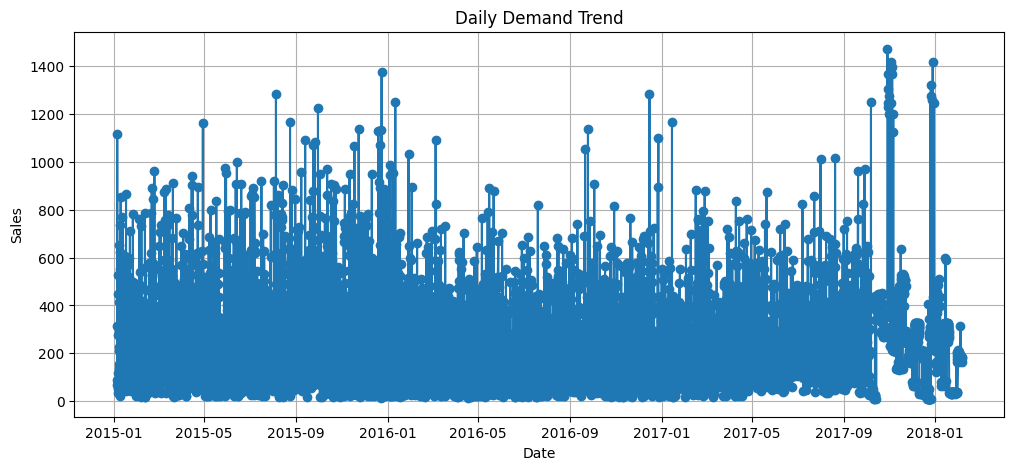

In [9]:
# Aggregate daily sales
daily_sales = df.groupby('Order_Date')['Sales'].sum().reset_index()

# Plot daily demand trend
plt.figure(figsize=(12,5))
plt.plot(daily_sales['Order_Date'], daily_sales['Sales'], marker='o')
plt.title('Daily Demand Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [10]:
# Total sales per product
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort descending to see fast movers
product_sales = product_sales.sort_values(by='Sales', ascending=False)
product_sales.head(10)  # top 10 fast movers


,Product Name,Sales
48,Perfect Fitness Perfect Rip Deck,315421.425064
42,Nike Men's Free 5.0+ Running Shoe,258263.698410
41,Nike Men's Dri-FIT Victory Golf Polo,230257.500000
14,Diamondback Women's Serene Classic Comfort Bi,213688.095094
38,Nike Men's CJ Elite 2 TD Football Cleat,154158.268678
17,Field & Stream Sportsman 16 Gun Fire Safe,136470.643773
54,Smart watch,105063.611511
71,Under Armour Girls' Toddler Spine Surge Runni,91943.140601
11,Dell Laptop,27285.000000
79,Web Camera,19340.549836


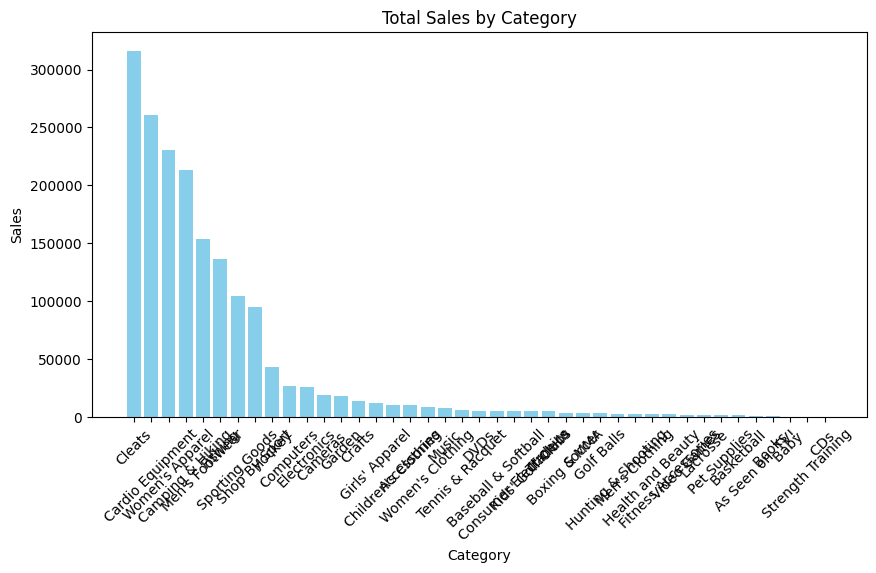

In [11]:
category_sales = df.groupby('Category Name')['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Bar chart
plt.figure(figsize=(10,5))
plt.bar(category_sales['Category Name'], category_sales['Sales'], color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Average lead time per category
lead_time_cat = df.groupby('Category Name')['Lead_Time'].mean().reset_index()

# Sort descending
lead_time_cat = lead_time_cat.sort_values(by='Lead_Time', ascending=False)
lead_time_cat


,Category Name,Lead_Time
33,Soccer,4.500000
7,CDs,4.142857
36,Tennis & Racquet,4.088889
28,Men's Clothing,4.062500
37,Trade-In,4.021505
16,DVDs,3.950000
13,Computers,3.904762
17,Electronics,3.884120
30,Music,3.878788
3,Baseball & Softball,3.871795


In [13]:
# Percentage of orders at risk of late delivery
late_risk_summary = df.groupby('Product Name')['Late_Risk'].mean().reset_index()
late_risk_summary = late_risk_summary.sort_values(by='Late_Risk', ascending=False)
late_risk_summary.head(10)


,Product Name,Late_Risk
6,Bushnell Pro X7 Jolt Slope Rangefinder,1.000000
13,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.000000
81,adidas Brazuca 2014 Official Match Ball,1.000000
70,Total Gym 1400,1.000000
53,SOLE E25 Elliptical,1.000000
45,Nike Women's Free 5.0 TR FIT PRT 4 Training S,1.000000
29,GoPro HERO3+ Black Edition Camera,1.000000
80,Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,1.000000
1,Baby sweater,0.800000
7,CDs of rock,0.785714


In [14]:
# Estimated demand during lead time
df['Estimated_Lead_Demand'] = df['Sales'] * df['Lead_Time']

# Aggregate per product
lead_demand = df.groupby('Product Name')['Estimated_Lead_Demand'].sum().reset_index()
lead_demand = lead_demand.sort_values(by='Estimated_Lead_Demand', ascending=False)
lead_demand.head(10)


,Product Name,Estimated_Lead_Demand
48,Perfect Fitness Perfect Rip Deck,1.218336e+06
42,Nike Men's Free 5.0+ Running Shoe,9.872405e+05
41,Nike Men's Dri-FIT Victory Golf Polo,8.875562e+05
14,Diamondback Women's Serene Classic Comfort Bi,7.730983e+05
38,Nike Men's CJ Elite 2 TD Football Cleat,5.547026e+05
17,Field & Stream Sportsman 16 Gun Fire Safe,4.861157e+05
54,Smart watch,3.671949e+05
71,Under Armour Girls' Toddler Spine Surge Runni,3.482924e+05
11,Dell Laptop,1.060500e+05
33,Lawn mower,6.532367e+04


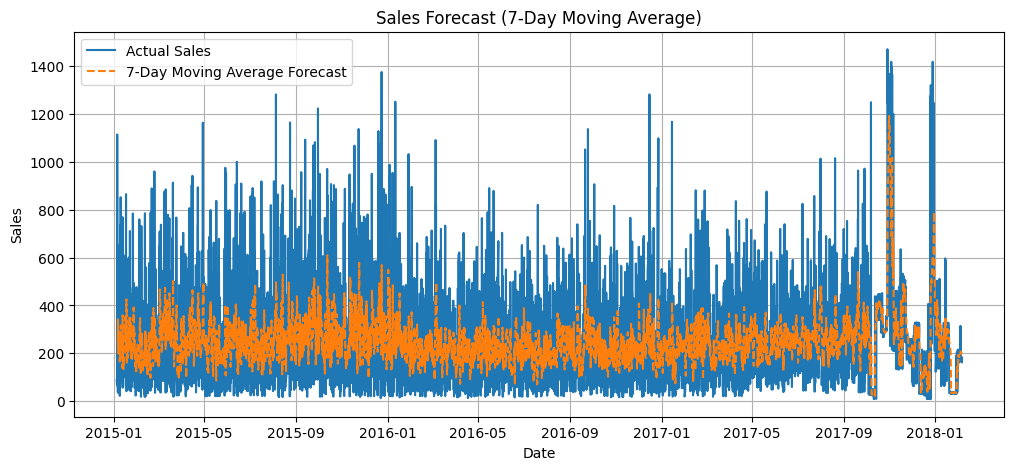

In [15]:
# Aggregate daily sales for all products
daily_sales = df.groupby('Order_Date')['Sales'].sum().reset_index()

# 7-day moving average forecast
daily_sales['7d_MA'] = daily_sales['Sales'].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12,5))
plt.plot(daily_sales['Order_Date'], daily_sales['Sales'], label='Actual Sales')
plt.plot(daily_sales['Order_Date'], daily_sales['7d_MA'], label='7-Day Moving Average Forecast', linestyle='--')
plt.title('Sales Forecast (7-Day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


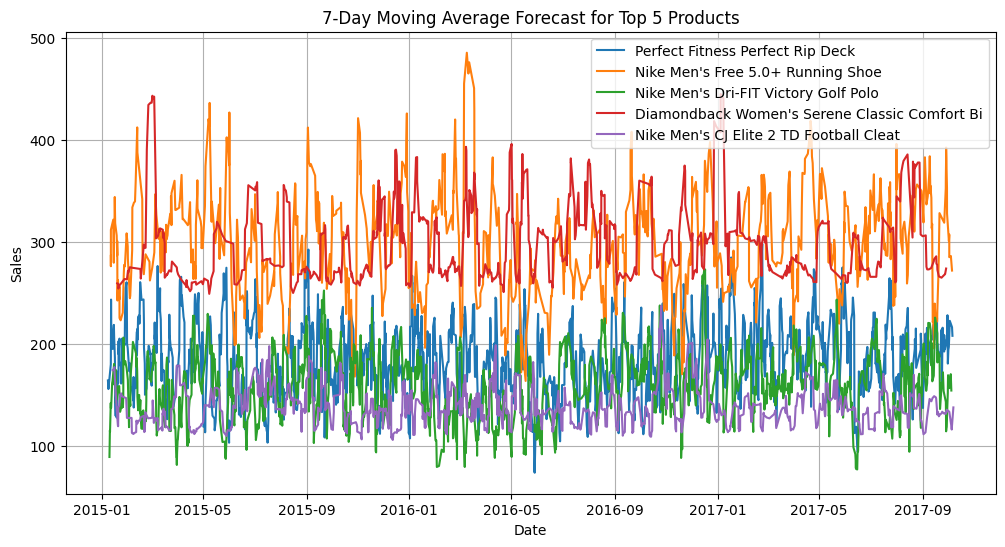

In [16]:
# Top 5 products by sales
top_products = product_sales['Product Name'].head(5)

plt.figure(figsize=(12,6))
for prod in top_products:
    temp = df[df['Product Name'] == prod].groupby('Order_Date')['Sales'].sum().rolling(window=7).mean()
    plt.plot(temp.index, temp.values, label=prod)

plt.title('7-Day Moving Average Forecast for Top 5 Products')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Fast vs slow movers
fast_movers = product_sales.head(10)
slow_movers = product_sales.tail(10)

# Lead time and risk summary
lead_risk_summary = df.groupby('Product Name').agg({
    'Lead_Time': 'mean',
    'Late_Risk': 'mean'
}).reset_index()

# Merge top fast movers with lead/risk
fast_movers_summary = fast_movers.merge(lead_risk_summary, on='Product Name')
fast_movers_summary = fast_movers_summary.sort_values(by='Late_Risk', ascending=False)
fast_movers_summary.head(10)

,Product Name,Sales,Lead_Time,Late_Risk
9,Web Camera,19340.549836,3.062500,0.770833
8,Dell Laptop,27285.000000,3.904762,0.666667
5,Field & Stream Sportsman 16 Gun Fire Safe,136470.643773,3.578249,0.636605
4,Nike Men's CJ Elite 2 TD Football Cleat,154158.268678,3.594880,0.635542
3,Diamondback Women's Serene Classic Comfort Bi,213688.095094,3.613836,0.598742
6,Smart watch,105063.611511,3.490196,0.554622
0,Perfect Fitness Perfect Rip Deck,315421.425064,3.832251,0.506494
1,Nike Men's Free 5.0+ Running Shoe,258263.698410,3.766219,0.494407
2,Nike Men's Dri-FIT Victory Golf Polo,230257.500000,3.808564,0.486146
7,Under Armour Girls' Toddler Spine Surge Runni,91943.140601,3.766038,0.476730


In [19]:
# Example KPI summary
kpi_summary = pd.DataFrame({
    'Metric': ['Avg Lead Time', 'Avg Late Risk', 'Total Sales', 'Top 5 Products Share'],
    'Value': [
        df['Lead_Time'].mean(),
        df['Late_Risk'].mean(),
        df['Sales'].sum(),
        round(df[df['Product Name'].isin(top_products)]['Sales'].sum() / df['Sales'].sum() * 100, 2)
    ]
})

kpi_summary


,Metric,Value
0,Avg Lead Time,3.710518e+00
1,Avg Late Risk,5.381530e-01
2,Total Sales,1.777295e+06
3,Top 5 Products Share,6.593000e+01
